# CSE 572: Homework 1

This notebook provides a template and starting code to implement Parts 1 and 2 of the Homework 1 assignment.

To execute and make changes to this notebook, click File > Save a copy to save your own version in your Google Drive or Github. Read the step-by-step instructions below carefully. To execute the code, click on each cell below and press the SHIFT-ENTER keys simultaneously or by clicking the Play button. 

When you finish executing all code/exercises, save your notebook then download a copy (.ipynb file). Submit the following **two** minimum items:
1. the .ipynb file, and
2. a pdf of the executed notebook on Canvas.

To generate a pdf of the notebook, click File > Print > Save as PDF.

## Part 1: Understand your data

You will use the [Census Income dataset](https://archive.ics.uci.edu/ml/datasets/Adult) for the Homework 1 assignment.

The first step in a Data Mining project is to understand ins and outs of your chosen dataset. In Lecture 2, we went over 20 Questions to ask your data. Answer the questions from the Homework 1 assignment document about the provided dataset. The code below loads the dataset as a pandas dataframe. You may add any additional code needed to answer the questions in Part 1, but your answers should be written separately in a PDF as specified in the PDF instructions.


In [89]:
import pandas as pd
import numpy as np

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
data.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
                'class']

data = data.drop(['fnlwgt', 'education-num'], axis=1)

data = data.replace(' ?', np.nan)

data.sample(10)

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
10388,27,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
12395,68,Private,Some-college,Divorced,Exec-managerial,Not-in-family,White,Male,0,0,30,United-States,<=50K
30103,57,Federal-gov,Bachelors,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,48,United-States,>50K
32078,25,Private,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
24176,39,State-gov,Some-college,Separated,Prof-specialty,Unmarried,Black,Female,0,0,37,United-States,<=50K
4107,52,Private,Preschool,Married-civ-spouse,Other-service,Not-in-family,White,Male,0,0,40,El-Salvador,<=50K
23745,48,Private,10th,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,65,United-States,>50K
24317,51,State-gov,Doctorate,Married-civ-spouse,Exec-managerial,Husband,White,Male,7688,0,55,United-States,>50K
28957,21,NaN,Some-college,Never-married,NaN,Own-child,White,Female,0,0,35,United-States,<=50K
16703,30,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [90]:
data.shape
print(data.info())
print("Total Number of Missing Values: {}".format(data.isna().any(axis=1).sum()))
print("Total Number of Duplicate Values: {}".format(data.duplicated().sum()))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   education       32561 non-null  object
 3   marital-status  32561 non-null  object
 4   occupation      30718 non-null  object
 5   relationship    32561 non-null  object
 6   race            32561 non-null  object
 7   sex             32561 non-null  object
 8   capital-gain    32561 non-null  int64 
 9   capital-loss    32561 non-null  int64 
 10  hours-per-week  32561 non-null  int64 
 11  native-country  31978 non-null  object
 12  class           32561 non-null  object
dtypes: int64(4), object(9)
memory usage: 3.2+ MB
None
Total Number of Missing Values: 2399
Total Number of Duplicate Values: 3465


In [91]:
# YOUR CODE HERE
# Let define continous and catagorical cols
continuous_cols = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_cols = ['workclass', 'education', 'marital-status','occupation', 'relationship', 'race', 'sex', 'native-country']
categorical_cols_w_o_sensetive_data = ['workclass', 'education', 'marital-status','occupation', 'relationship']


In [92]:
# YOUR CODE HERE
SEED = 0



# NORMALIZATION AND STANDARDIZATION

In [93]:
from sklearn.preprocessing import Normalizer, StandardScaler

# NORMALIZE THE DATASET
def normalize(trainDataFrame, testDataFrame):
    continuous_cols = trainDataFrame.select_dtypes(include='number').columns
    normalizer = Normalizer()
    trainDataFrame[continuous_cols] = normalizer.fit_transform(trainDataFrame[continuous_cols])
    testDataFrame[continuous_cols] = normalizer.transform(testDataFrame[continuous_cols])
    return trainDataFrame, testDataFrame

# STANDARDIZE THE DATASET
def featurewise_standardize(trainDataFrame, testDataFrame):
    continuous_cols = trainDataFrame.select_dtypes(include='number').columns
    scaler = StandardScaler()
    trainDataFrame[continuous_cols] = scaler.fit_transform(trainDataFrame[continuous_cols])
    testDataFrame[continuous_cols] = scaler.transform(testDataFrame[continuous_cols])
    return trainDataFrame, testDataFrame


# HANDLE THE MISSING AND DUPLICATE DATA

In [94]:
# CLEAN DATA
def clean_data(df):
    df = df.dropna().drop_duplicates()
    target = df.pop('class')
    return df, target


## Conversion of categorical data to numerical data or vice versa

In [95]:
# REPLACE CATAGORIES WITH NUMBERS
for col in categorical_cols:
  data[col] = data[col].astype('category').cat.codes
data['class'] = data['class'].astype('category').cat.codes
data

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,6,9,4,0,1,4,1,2174,0,40,38,0
1,50,5,9,2,3,0,4,1,0,0,13,38,0
2,38,3,11,0,5,1,4,1,0,0,40,38,0
3,53,3,1,2,5,0,2,1,0,0,40,38,0
4,28,3,9,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,3,7,2,12,5,4,0,0,0,38,38,0
32557,40,3,11,2,6,0,4,1,0,0,40,38,1
32558,58,3,11,6,0,4,4,0,0,0,40,38,0
32559,22,3,11,4,0,3,4,1,0,0,20,38,0


# DATA PLOTTING

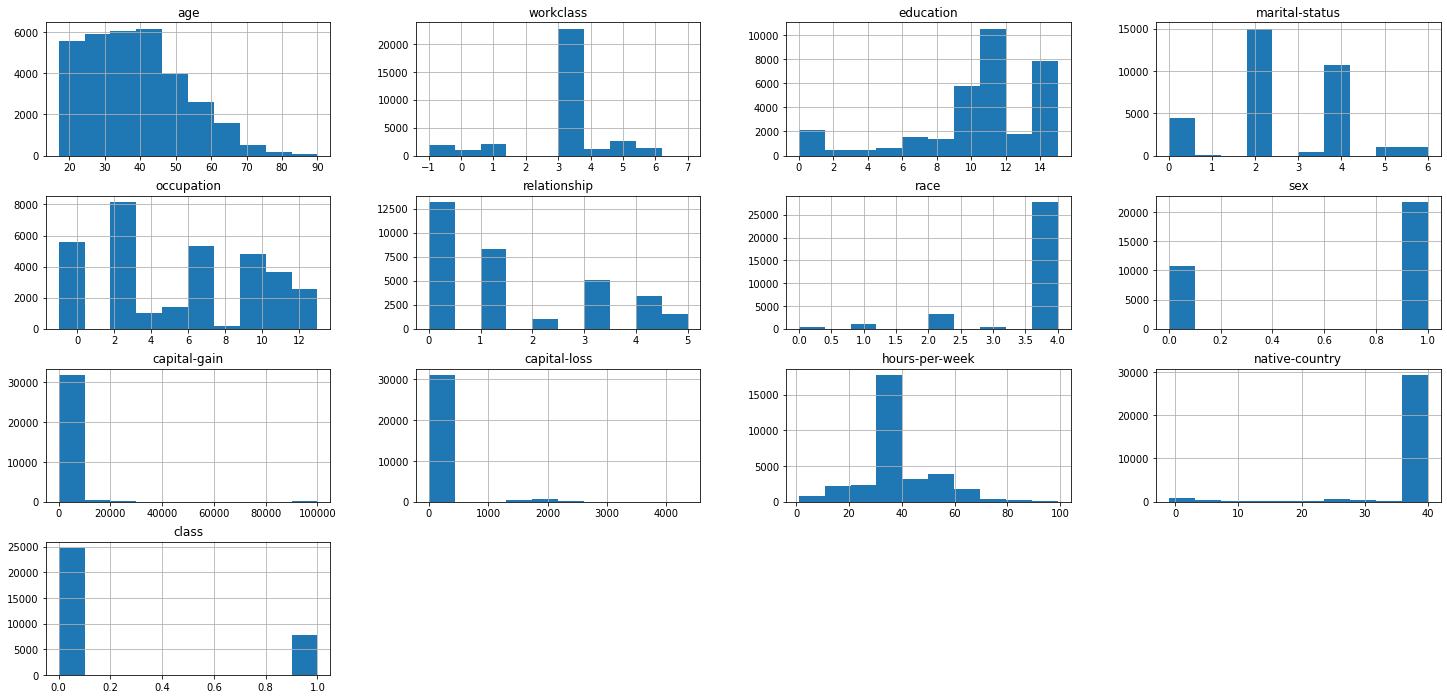

In [96]:
import matplotlib.pyplot as plt
data.hist(figsize=(25,12))
plt.show()

                     age  workclass  education  marital-status  occupation  \
age             1.000000   0.003787  -0.010508       -0.266288   -0.020947   
workclass       0.003787   1.000000   0.023513       -0.064731    0.254892   
education      -0.010508   0.023513   1.000000       -0.038407   -0.021260   
marital-status -0.266288  -0.064731  -0.038407        1.000000   -0.009654   
occupation     -0.020947   0.254892  -0.021260       -0.009654    1.000000   
relationship   -0.263698  -0.090461  -0.010876        0.185451   -0.075607   
race            0.028718   0.049742   0.014131       -0.068013    0.006763   
sex             0.088832   0.095981  -0.027356       -0.129314    0.080296   
capital-gain    0.077674   0.033835   0.030046       -0.043393    0.025505   
capital-loss    0.057775   0.012216   0.016746       -0.034187    0.017987   
hours-per-week  0.068756   0.138962   0.055510       -0.190519    0.080383   
native-country -0.001151  -0.007690   0.064288       -0.023819  

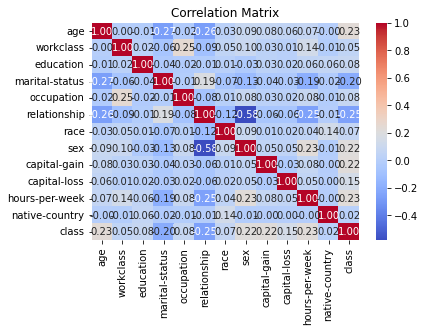

In [97]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = data.corr()

# Print the correlation matrix
print(corr)

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [87]:
import pandas as pd


# Compute the correlation coefficient between each feature and the target class
correlations = data.corr()['class'].sort_values(ascending=False)

# Print the correlation coefficients
print(correlations)

# Identify the strongly correlated features (correlation coefficient > 0.7 or < -0.7)
strong_correlations = correlations[abs(correlations) > 0.7]
print("Features strongly correlated with the target class: {}".format(strong_correlations))

print(data['class'].value_counts())
# CLEAN DATA
data, target = clean_data(data)
print(data)
print(target)

class             1.000000
age               0.234037
hours-per-week    0.229689
capital-gain      0.223329
sex               0.215980
capital-loss      0.150526
education         0.079317
occupation        0.075468
race              0.071846
workclass         0.051604
native-country    0.015840
marital-status   -0.199307
relationship     -0.250918
Name: class, dtype: float64
Features strongly correlated with the target class: class    1.0
Name: class, dtype: float64
0    24720
1     7841
Name: class, dtype: int64
       age  workclass  education  marital-status  occupation  relationship  \
0       39          6          9               4           0             1   
1       50          5          9               2           3             0   
2       38          3         11               0           5             1   
3       53          3          1               2           5             0   
4       28          3          9               2           9             5   
...    ...  

# Feature Selection and Dropping Sensetive coloumns.

In [50]:
data = data.drop(['race', 'sex', 'native-country'], axis=1)

## Part 2: Construct your classifier

In Part 2, you will implement a classifier to predict whether an individual has high or low income based on the US Census dataset. See the Homework 1 instructions for more details. Note that Part 2 requires a separate PDF document detailing the results from your model as specified in the Homework 1 instructions.

### Model Training

The details of training your model will vary depending on which model you choose to implement. See the Homework 1 instructions for more details.

In [53]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Split the data into 60% training, 20% testing, and 20% validation
X_train, X_test_val, Y_train, Y_test_val = train_test_split(data, target, test_size=0.4, random_state=SEED)
X_test, X_val, Y_test, Y_val = train_test_split(X_test_val, Y_test_val, test_size=0.5, random_state=SEED)

# Label encode the categorical columns in the train, validation, and test sets
def label_encode(df, categorical_cols):
    le = LabelEncoder()
    for col in categorical_cols_w_o_sensetive_data:
        df[col] = le.fit_transform(df[col].astype(str))
    return df

# Label encode the data for training, testing, and validation sets
X_train_new = label_encode(X_train, categorical_cols)
X_test_new = label_encode(X_test, categorical_cols)
X_val_new = label_encode(X_val, categorical_cols)

X_test_new


,age,workclass,education,marital-status,occupation,relationship,capital-gain,capital-loss,hours-per-week
6487,28,3,15,2,14,0,0,0,40
28225,39,3,15,0,8,4,0,0,60
18191,57,3,3,0,1,2,0,0,40
12128,45,4,3,2,7,0,0,0,48
31082,47,2,7,2,3,0,0,0,40
...,...,...,...,...,...,...,...,...,...
12353,27,3,13,4,4,1,0,0,40
15950,63,5,7,0,8,1,0,0,50
27843,30,3,7,2,4,0,0,1848,40
882,27,3,3,2,7,0,0,0,70


In [54]:
X_train_new, X_test_new = normalize(X_train_new, X_test_new)
X_train_new, X_val_new = normalize(X_train_new, X_val_new)

### Evaluation

Your final model evaluation should be performed on the test set. Report the following metrics: 
- Overall accuracy
- Precision
- Recall
- F1 score

# SUPPORT VECTOR MACHINE - MODEL

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


# Split the data into train, test, and validation sets
X_train, X_val, X_test = X_train_new, X_val_new, X_test_new

# define the parameter grid to search over
param_grid = {'C': [1, 10, 100],
            'kernel': ['rbf', 'poly']}

# create the SVM model object
svm_model = SVC()

# create the GridSearchCV object to search over the parameter grid
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')

# fit the GridSearchCV object to the training data
grid_search.fit(X_train_new, Y_train)

# print the best hyperparameters and the corresponding test score
print("Best hyperparameters:", grid_search.best_params_)
print("Test score with best hyperparameters:", grid_search.score(X_test_new, Y_test))

Best hyperparameters: {'C': 100, 'kernel': 'poly'}
Test score with best hyperparameters: 0.7896545798247121


In [56]:
gridSearchBest = grid_search.best_estimator_

# Predict the classes for validation set
Y_val_pred = gridSearchBest.predict(X_val_new)

# Compute the accuracy of the classifier
val_acc = accuracy_score(Y_val, Y_val_pred)
print('Validation accuracy:', val_acc)

# Predict the classes for test set
Y_predTest=gridSearchBest.predict(X_test_new)

# Compute the accuracy of the classifier on test set
test_acc = accuracy_score(Y_test, Y_predTest)
print('Test accuracy:', test_acc)


Validation accuracy: 0.7939862542955326
Test accuracy: 0.7896545798247121


## Overall accuracy, Precision, Recall, F1 score

In [57]:
from sklearn.metrics import precision_recall_fscore_support

# Calculate and print overall accuracy
accuracy = test_acc
print(f"Overall Accuracy: {accuracy}")

# Calculate and print precision, recall, and F1 score using micro averaging
precision, recall, fscore, _ = precision_recall_fscore_support(Y_test, Y_predTest, average='micro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {fscore}")

Overall Accuracy: 0.7896545798247121
Precision: 0.7896545798247121
Recall: 0.7896545798247121
F1 Score: 0.7896545798247121


# Decision Tree Classifier

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

# Define the decision tree classifier and parameter grid
dtc = DecisionTreeClassifier()
param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(4, 10)
}

# Perform grid search cross-validation
dtc_grid = GridSearchCV(dtc, param_grid=param_grid, scoring='accuracy', cv=5)
dtc_grid.fit(X_train, Y_train)

# Print the best parameters and accuracy score
best_params = dtc_grid.best_params_
best_estimator = dtc_grid.best_estimator_

Y_predVal = best_estimator.predict(X_val)
val_accuracy = accuracy_score(Y_val, Y_predVal) * 100

Y_predTest = best_estimator.predict(X_test)
test_accuracy = accuracy_score(Y_test, Y_predTest) * 100

print(f"Best Parameters: {best_params}")
print(f"Overall Accuracy: {test_accuracy}")

# Calculate and print precision, recall, and F1 score using micro averaging
precision, recall, fscore, _ = precision_recall_fscore_support(Y_test, Y_predTest, average='micro')
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {fscore}")


Best Parameters: {'criterion': 'gini', 'max_depth': 9}
Overall Accuracy: 83.82883656985737
Precision: 0.8382883656985737
Recall: 0.8382883656985737
F1 Score: 0.8382883656985736
